<a href="https://colab.research.google.com/github/poornimagithubrit/Owl-M-A-Material-Design-Study-App-material/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
url='https://raw.githubusercontent.com/isaaccs/sentiment-analysis-for-financial-news/master/all-data.csv'
data=pd.read_csv(url, encoding="cp1252",header=None)

In [ ]:
data.columns = ['sentiment','text']
print(data.head(20))

   sentiment                                               text
0    neutral  According to Gran , the company has no plans t...
1    neutral  Technopolis plans to develop in stages an area...
2   negative  The international electronic industry company ...
3   positive  With the new production plant the company woul...
4   positive  According to the company 's updated strategy f...
5   positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6   positive  For the last quarter of 2010 , Componenta 's n...
7   positive  In the third quarter of 2010 , net sales incre...
8   positive  Operating profit rose to EUR 13.1 mn from EUR ...
9   positive  Operating profit totalled EUR 21.1 mn , up fro...
10  positive  TeliaSonera TLSN said the offer is in line wit...
11  positive  STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN...
12  positive  A purchase agreement for 7,200 tons of gasolin...
13  positive  Finnish Talentum reports its operating profit ...
14  positive  Clothing retail chain Sepp

There are 4846 observations
There are 2 columns 

There are no missing values 

sentiment seems to be a categorical feature 

labels repartition in % 

sentiment
neutral     59.409823
positive    28.126290
negative    12.463888
Name: count, dtype: float64


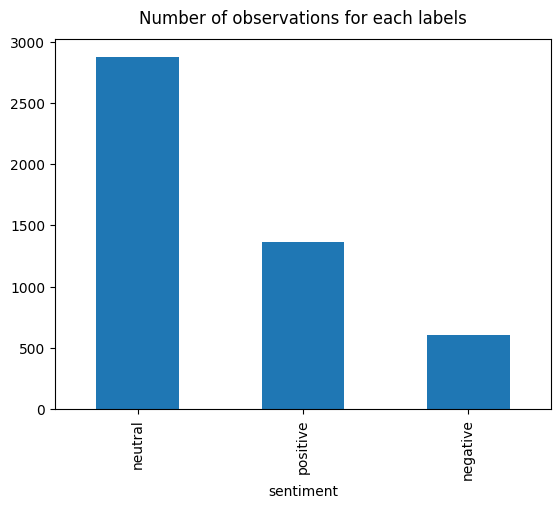

In [ ]:
def classical_data_stat(data,y):
  """Inputs : dataset and target variable
    Outpus : some satistical about the dataset and Y"""
  print('There are {} observations'.format(data.shape[0]))
  print('There are {} columns \n'.format(data.shape[1]))
  if not data.isnull().values.any():
    print('There are no missing values \n')
  else :
    print('There are  missing values \n')
  if len(data[y].unique())<50:
    print('{} seems to be a categorical feature \n'.format(y))
    data[y].value_counts().plot(kind='bar')
    plt.title("Number of observations for each labels", y=1.02)
    print('labels repartition in % \n')
    print(100*data[y].value_counts()/data.shape[0])
  else:
    print('{} seems to be a continous feature \n'.format(y))
classical_data_stat(data,'sentiment')

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
  """ INPUT : Sentence
  OUTPUT : Sentence
  Pre processing step for a pandas dataset """
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"")
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)


data['text']=data['text'].map(lambda s:preprocess(s))

In [ ]:
def ngrams(input, n):
    """ INPUT : Sentence and number of n-grams
  OUTPUT N-Grams
  An n-gram is a contiguous sequence of n items from a given sample of text or speech.
  """
    output = []
    for i in range(len(input)-n+1):
        output.append('_'.join(input[i:i+n]))
    return output


In [ ]:
nltk.download('punkt')
tags = ['neutral','negative','positive']



data_bis = data[data.sentiment.isin(tags)]
##Create N-Grams
data_bis['Tokens'] = data_bis.apply(lambda row: nltk.word_tokenize(row['text'].strip()), axis=1)
data_bis['bi_Grams']  = data_bis.apply(lambda row: ngrams(row['Tokens'], 2), axis=1)
data_bis['tri_Grams']  = data_bis.apply(lambda row: ngrams(row['Tokens'], 3), axis=1)
print(len(data_bis),'samples from',len(tags),'classes')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


4846 samples from 3 classes


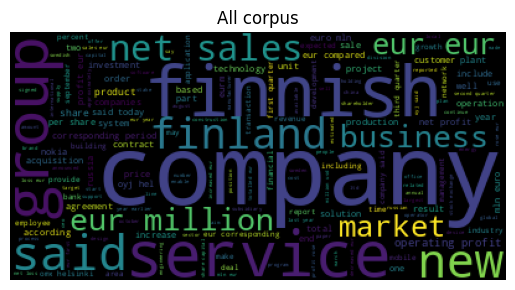

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_word_cloud(data,text='text',label=None,save=True):
  """ Inputs : Dataset, text colums,labels column
  Output : Word cloud for all the corpus and for each label"""
  word_cloud_data = " ".join([post for post in data[text] ])
  word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
  plt.figure()
  plt.imshow(word_cloud_data)
  plt.title('All corpus')
  plt.axis("off")
  plt.show()
  if save:
    plt.savefig('wordcloud.png', dpi=300)
  if label !=None:
    labels=data[label].unique()
    for i in range(len(labels)):
          word_cloud_data = " ".join([post for (post,label) in zip(data[text],data[label]) if label==labels[i]])
          word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
          plt.figure(i)
          plt.imshow(word_cloud_data)
          plt.title('{}'.format(labels[i]))
          plt.axis("off")
plot_word_cloud(data,text='text')

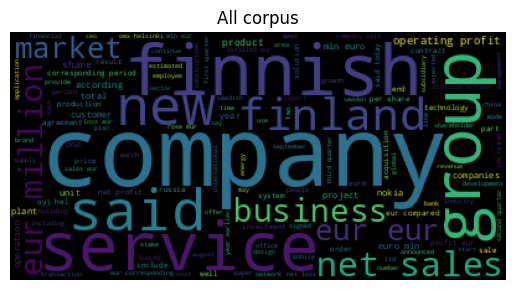

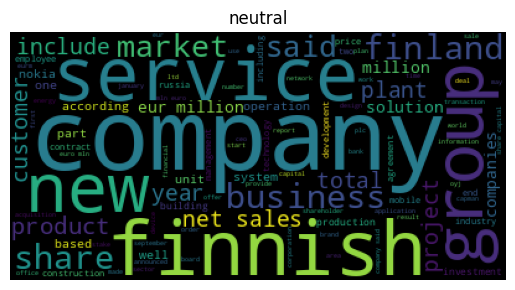

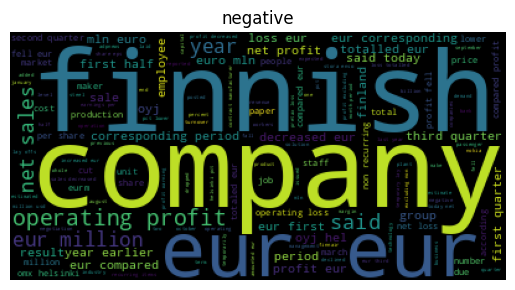

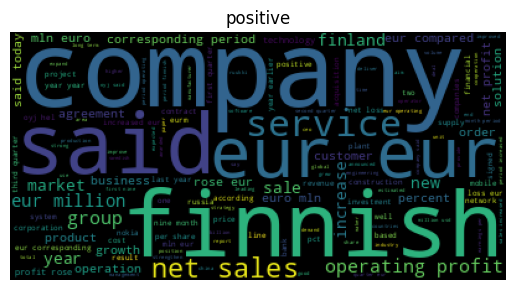

In [ ]:
plot_word_cloud(data,'text','sentiment',False)

In [ ]:
def word_frequencies(data,word):

  c_unique = Counter()
  for ind in data.index:
      c_unique.update(Counter(set(data.loc[ind][word])))

  print('First 20 common words:\n')
  for word in c_unique.most_common(20):
      print(word[0],'-->', 'appeared in',word[1],'documents out of {} documents i.e.'.format(len(data)),np.round(100*word[1]/len(data),2),'%')

word_frequencies(data_bis,'Tokens')

First 20 common words:

company --> appeared in 801 documents out of 4846 documents i.e. 16.53 %
eur --> appeared in 801 documents out of 4846 documents i.e. 16.53 %
said --> appeared in 544 documents out of 4846 documents i.e. 11.23 %
finnish --> appeared in 512 documents out of 4846 documents i.e. 10.57 %
sales --> appeared in 428 documents out of 4846 documents i.e. 8.83 %
profit --> appeared in 406 documents out of 4846 documents i.e. 8.38 %
net --> appeared in 384 documents out of 4846 documents i.e. 7.92 %
year --> appeared in 341 documents out of 4846 documents i.e. 7.04 %
finland --> appeared in 331 documents out of 4846 documents i.e. 6.83 %
million --> appeared in 311 documents out of 4846 documents i.e. 6.42 %
group --> appeared in 305 documents out of 4846 documents i.e. 6.29 %
operating --> appeared in 294 documents out of 4846 documents i.e. 6.07 %
new --> appeared in 261 documents out of 4846 documents i.e. 5.39 %
business --> appeared in 251 documents out of 4846 docume

In [ ]:
def stat_des_text(data,col,text,word):
  """ Inputs : Dataset, labels column, text colums, N-Grams, Worcloud
      Output : Word frequencie for each labels
  """
  labels=data[col].unique()

  c_unique = Counter()
  for ind in data_bis.index:
    c_unique.update(Counter(set(data.loc[ind][word])))

  labels=data[col].unique()
  tag_dict = {tag:Counter() for tag in labels}
  b=['_Words','_%']
  for ind in data.index:
      tag = data.loc[ind][col]
      tag_dict[tag].update(Counter(set(data.loc[ind][word])))
  tag_specific_words = pd.DataFrame(columns=[label+number for label in labels for number in b])
  for tag in labels:
      len_tag = len(data[data[col]==tag])
      words = []
      percent = []
      for word in tag_dict[tag].most_common(16):
          words.append(word[0])
          percent.append(np.round(100*word[1]/len_tag,2))
      tag_specific_words[tag+'_Words'] = words
      tag_specific_words[tag+'_%'] = percent
  display(tag_specific_words)


  for n_stop_words in [50,500,5000]:
      tag_specific_words = pd.DataFrame(columns=[label+number for label in tags for number in b])
      print('Ignoring first',n_stop_words,'stop-words ##############')
      StopWords = [ii[0] for ii in c_unique.most_common(n_stop_words)]
      for tag in labels:
          len_tag = len(data[data[col]==tag])
          jj = 0
          words = []
          percent = []
          for word in tag_dict[tag].most_common(2*n_stop_words):
              if word[0] not in StopWords:
                  words.append(word[0])
                  percent.append(np.round(100*word[1]/len_tag,2))
                  jj += 1
              if jj == 20:
                  break
          tag_specific_words[tag+'_Words'] = words
          tag_specific_words[tag+'_%'] = percent
      display(tag_specific_words)
      print('\n\n')

In [ ]:
stat_des_text(data_bis,'sentiment','text','Tokens')

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,company,16.43,eur,36.26,eur,24.14
1,eur,8.79,profit,25.66,company,17.02
2,said,8.23,finnish,16.23,said,16.87
3,finnish,7.47,operating,16.06,finnish,14.60
4,finland,7.36,company,15.89,profit,14.01
5,new,6.18,net,15.89,sales,13.28
6,business,6.15,sales,15.07,net,13.06
7,group,6.11,year,14.57,year,12.91
8,sales,5.42,period,13.91,operating,8.66
9,million,5.07,quarter,12.75,period,8.66


Ignoring first 50 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,value,2.78,decreased,10.93,rose,6.82
1,development,2.57,fell,7.45,increased,5.80
2,investment,2.50,result,5.79,increase,5.36
3,construction,2.47,earlier,5.13,signed,4.26
4,part,2.36,half,5.13,agreement,4.18
5,one,2.33,lower,4.64,percent,3.74
6,customers,2.19,third,4.30,growth,3.08
7,approximately,2.19,totalled,4.30,order,3.08
8,board,2.12,lay,3.64,last,2.93
9,stock,2.05,second,3.15,earlier,2.79





Ignoring first 500 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,espoo,0.69,temporarily,2.15,improved,1.54
1,options,0.66,dropped,2.15,narrowed,1.25
2,ahlstrom,0.66,jobs,1.99,versus,1.10
3,subscription,0.66,temporary,1.99,rise,1.03
4,subscribed,0.63,negative,1.99,efficiency,1.03
5,within,0.63,declined,1.82,strengthen,0.95
6,park,0.63,offs,1.82,estimates,0.95
7,alexandria,0.63,warning,1.82,metal,0.95
8,tikkurila,0.63,workers,1.66,able,0.95
9,france,0.63,fall,1.66,beer,0.88





Ignoring first 5000 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,doctors,0.03,scanned,0.17,army,0.07
1,ultrascan,0.03,arokarhu,0.17,unify,0.07
2,crackers,0.03,pressed,0.17,classroom,0.07
3,password,0.03,disappeared,0.17,teachers,0.07
4,addus,0.03,aiming,0.17,entering,0.07
5,assistance,0.03,biocare,0.17,oats,0.07
6,nursing,0.03,scala,0.17,phonebook,0.07
7,adult,0.03,nobel,0.17,kouvola,0.07
8,rehabilitative,0.03,bucking,0.17,metrics,0.07
9,skilled,0.03,slipping,0.17,scorecard,0.07


In [ ]:
stat_des_text(data_bis,'sentiment','text','bi_Grams')

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,net_sales,3.30,eur_eur,10.93,eur_eur,8.73
1,eur_million,2.33,operating_profit,9.60,net_sales,7.34
2,company_said,1.42,net_sales,7.95,operating_profit,7.34
3,share_capital,1.29,corresponding_period,7.28,corresponding_period,4.55
4,operating_profit,1.22,eur_compared,6.62,eur_million,4.48
5,stock_exchange,1.11,decreased_eur,6.62,rose_eur,3.96
6,sales_eur,1.04,profit_eur,5.79,net_profit,3.82
7,mln_euro,1.04,eur_corresponding,5.63,eur_compared,3.30
8,omx_helsinki,1.04,net_profit,5.63,said_today,3.23
9,alma_media,1.01,eur_million,4.64,profit_rose,3.15


Ignoring first 50 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,voting_rights,0.87,compared_profit,2.98,first_nine,1.69
1,real_estate,0.80,fell_eur,2.65,period_increased,1.47
2,new_shares,0.66,non_recurring,2.48,sales_increased,1.25
3,general_meeting,0.66,profit_fell,2.48,respectively_eur,1.25
4,eur_per,0.63,recurring_items,2.32,adp_news,1.25
5,finnish_company,0.59,sales_decreased,2.32,increased_respectively,1.17
6,helsinki_finland,0.56,profit_decreased,2.32,today_net,1.17
7,nasdaq_omx,0.52,share_eps,1.82,compared_corresponding,1.10
8,financial_details,0.52,excluding_non,1.82,signed_agreement,1.10
9,stock_option,0.49,amounted_eur,1.66,cash_flow,1.10





Ignoring first 500 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,operating_system,0.21,slipped_net,0.83,rose_year,0.37
1,value_deal,0.21,personnel_reductions,0.83,sales_grew,0.37
2,high_performance,0.21,loss_totaled,0.83,finnish_lifting,0.37
3,said_agreed,0.21,issued_profit,0.83,orders_worth,0.37
4,subscription_price,0.21,dropped_eur,0.83,user_experience,0.37
5,subscription_period,0.21,eur_turnover,0.83,automation_solution,0.37
6,outlook_pharmaceutical,0.21,profit_month,0.83,profit_improved,0.37
7,building_construction,0.21,helsinki_pct,0.83,annual_savings,0.37
8,gross_area,0.21,declined_eur,0.83,swung_net,0.37
9,media_corporation,0.21,half_eur,0.66,nine_month,0.29





Ignoring first 5000 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,company_growing,0.03,employees_tallinn,0.17,therefore_increase,0.07
1,plans_move,0.03,postimees_reported,0.17,would_improve,0.07
2,although_company,0.03,earlier_layoffs,0.17,meet_expected,0.07
3,gran_company,0.03,facility_contrary,0.17,increase_production,0.07
4,according_gran,0.03,daily_postimees,0.17,materials_therefore,0.07
5,russia_although,0.03,elcoteq_laid,0.17,improve_use,0.07
6,move_production,0.03,electronic_industry,0.17,increase_demand,0.07
7,develop_stages,0.03,ranks_office,0.17,production_profitability,0.07
8,area_less,0.03,laid_tens,0.17,capacity_meet,0.07
9,stages_area,0.03,international_electronic,0.17,increase_capacity,0.07


In [ ]:
stat_des_text(data_bis,'sentiment','text','tri_Grams')

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,net_sales_eur,0.97,eur_corresponding_period,5.63,eur_corresponding_period,2.93
1,mln_euro_mln,0.94,decreased_eur_eur,2.98,rose_eur_eur,2.64
2,operating_profit_eur,0.69,compared_profit_eur,2.81,profit_rose_eur,2.42
3,eur_per_share,0.59,mln_euro_mln,2.48,mln_euro_mln,2.05
4,nasdaq_omx_helsinki,0.49,eur_compared_profit,2.32,first_nine_months,1.69
5,eur_net_sales,0.49,non_recurring_items,2.32,eur_million_usd,1.69
6,annual_general_meeting,0.45,eur_eur_corresponding,2.15,operating_profit_rose,1.54
7,stock_exchange_release,0.42,eur_compared_eur,2.15,eur_eur_corresponding,1.54
8,net_sales_mln,0.38,eur_million_usd,1.99,month_period_increased,1.39
9,sales_mln_euro,0.35,eur_first_half,1.99,net_profit_rose,1.32


Ignoring first 50 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,nasdaq_omx_helsinki,0.49,eur_compared_profit,2.32,net_loss_narrowed,0.95
1,net_sales_mln,0.38,eur_first_half,1.99,loss_narrowed_eur,0.88
2,sales_mln_euro,0.35,fell_eur_eur,1.82,operating_profit_net,0.81
3,headquartered_helsinki_finland,0.35,loss_totalled_eur,1.66,profit_net_sales,0.81
4,shares_voting_rights,0.31,operating_profit_excluding,1.66,eur_compared_loss,0.73
5,clear_overview_actual,0.31,profit_excluding_non,1.66,compared_loss_eur,0.66
6,actual_situation_future,0.31,operating_profit_fell,1.66,year_year_eur,0.66
7,overview_actual_situation,0.31,profit_fell_eur,1.66,rose_eur_million,0.66
8,brand_new_market,0.31,profit_decreased_eur,1.66,first_quarter_eur,0.59
9,situation_future_outlook,0.31,month_period_decreased,1.49,nine_months_eur,0.59





Ignoring first 500 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,euro_mln_operating,0.14,contract_manufacturer_scanfil,0.66,revenue_increased_eur,0.22
1,media_company_alma,0.10,eur_eur_first,0.66,sales_million_euros,0.22
2,company_alma_media,0.10,decreased_eur_million,0.66,percent_year_earlier,0.22
3,maximum_new_shares,0.10,finland_based_steel,0.50,went_year_year,0.22
4,stock_exchange_main,0.10,based_steel_maker,0.50,increase_net_sales,0.22
5,alma_media_shares,0.10,loss_eur_profit,0.50,compared_last_year,0.22
6,bank_hel_pohs,0.10,net_loss_widened,0.50,largest_stainless_steel,0.22
7,pohjola_bank_hel,0.10,start_personnel_negotiations,0.50,last_quarter_eur,0.22
8,bank_hel_samas,0.10,operating_loss_totaled,0.50,february_finnish_broadband,0.22
9,sampo_bank_hel,0.10,pretax_loss_totalled,0.50,quarter_eur_period,0.22





Ignoring first 5000 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,drinks_mineral_waters,0.03,google_nasdaq_goog,0.17,technology_said_signed,0.07
1,mineral_waters_ciders,0.03,users_earn_thousands,0.17,hydrocopper_plant_built,0.07
2,long_drinks_energy,0.03,becoming_google_nasdaq,0.17,first_hydrocopper_plant,0.07
3,market_share_soft,0.03,earn_thousands_dollars,0.17,erdenet_mine_site,0.07
4,share_soft_drinks,0.03,dollars_becoming_google,0.17,signed_mln_eur,0.07
5,drinks_energy_drinks,0.03,users_scamming_site,0.17,plant_built_erdenet,0.07
6,strengthen_market_share,0.03,goog_cash_advertiser,0.17,mln_eur_agreement,0.07
7,target_strengthen_market,0.03,takes_users_scamming,0.17,corporation_engineering_first,0.07
8,ciders_long_drinks,0.03,scamming_site_promising,0.17,eur_agreement_mongolia,0.07
9,waters_ciders_long,0.03,tinyurl_link_takes,0.17,outokumpu_technology_said,0.07


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Try reading the CSV file with the 'latin-1' encoding
df = pd.read_csv('all-data.csv', encoding='latin-1')

Saving all-data.csv to all-data.csv


In [ ]:
df.columns = ['sentiment','text']
df.head()

,sentiment,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Use 'sentiment' instead of 'label'
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=50000, ngram_range=(1, 3))

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
rf_clf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Best Accuracy: 0.7151682740272697


In [ ]:
svm_clf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_clf.fit(X_train_vec, y_train)

SVC(C=1, gamma=0.1)

In [ ]:
y_pred = svm_clf.predict(X_test_vec)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.6336429308565531
SVM Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.03      0.05       115
     neutral       0.64      0.99      0.78       567
    positive       0.58      0.17      0.27       287

    accuracy                           0.63       969
   macro avg       0.74      0.40      0.36       969
weighted avg       0.66      0.63      0.54       969



In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('rf', grid_search.best_estimator_), ('svm', svm_clf)], voting='soft')
ensemble_clf.fit(X_train_vec, y_train)

VotingClassifier(estimators=[('rf',
                              VotingClassifier(estimators=[('nb',
                                                            MultinomialNB()),
                                                           ('lr',
                                                            LogisticRegression(C=100.0,
                                                                               max_iter=1000))],
                                               voting='soft')),
                             ('svm', SVC(C=1, gamma=0.1, probability=True))],
                 voting='soft')

In [ ]:
svm_clf = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)  # Set probability to True
svm_clf.fit(X_train_vec, y_train)

#... (rest of your code)

ensemble_clf = VotingClassifier(estimators=[('rf', grid_search.best_estimator_), ('svm', svm_clf)], voting='soft')
ensemble_clf.fit(X_train_vec, y_train)


VotingClassifier(estimators=[('rf',
                              VotingClassifier(estimators=[('nb',
                                                            MultinomialNB()),
                                                           ('lr',
                                                            LogisticRegression(C=100.0,
                                                                               max_iter=1000))],
                                               voting='soft')),
                             ('svm', SVC(C=1, gamma=0.1, probability=True))],
                 voting='soft')

In [ ]:
y_pred = ensemble_clf.predict(X_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f'Ensemble Accuracy: {accuracy_percent:.2f}%')

Ensemble Accuracy: 76.19%


In [ ]:
import pandas as pd
import nltk
import re
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
data['text'] = data['text'].str.lower()
data['text'] = data['text'].str.replace('[^\w\s]', '',regex=True)
data['text'] = data['text'].str.strip()
data['text'] = data['text'].str.replace('\d+', '', regex=True)
data['text'] = data['text'].str.replace(r'http\S+', '', regex=True)
data['text'] = data['text'].str.replace(r'<.*?>', '', regex=True)

In [ ]:
def handle_negations(text):
    text = re.sub(r'\bnot\b', 'not_', text)
    text = re.sub(r'\bno\b', 'no_', text)
    return text

In [ ]:
data['text'] = data['text'].apply(handle_negations)

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(text):
    tokens = RegexpTokenizer(r'\w+').tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['text'] = data['text'].apply(preprocess)


In [ ]:
X = data['text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 3), stop_words='english')  # Adjusted parameters
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
nb_clf = MultinomialNB()
lr_clf = LogisticRegression(max_iter=1000)

In [ ]:
ensemble_clf = VotingClassifier(estimators=[('nb', nb_clf), ('lr', lr_clf)], voting='soft')

In [ ]:
param_grid_nb = {'nb__alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
param_grid_lr = {'lr__C': [0.01, 0.1, 1.0, 10.0, 100.0]}

In [ ]:
grid_search = GridSearchCV(ensemble_clf, param_grid=[param_grid_nb, param_grid_lr], cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('nb', MultinomialNB()),
                                                    ('lr',
                                                     LogisticRegression(max_iter=1000))],
                                        voting='soft'),
             param_grid=[{'nb__alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]},
                         {'lr__C': [0.01, 0.1, 1.0, 10.0, 100.0]}],
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'lr__C': 100.0}
Best Cross-validation Accuracy: 0.7327156634519455


In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_vec, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('lr',
                              LogisticRegression(C=100.0, max_iter=1000))],
                 voting='soft')

In [ ]:
y_pred = best_clf.predict(X_test_vec)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.51      0.63       110
     neutral       0.76      0.93      0.83       571
    positive       0.76      0.54      0.63       289

    accuracy                           0.76       970
   macro avg       0.78      0.66      0.70       970
weighted avg       0.77      0.76      0.75       970



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f'Accuracy: {accuracy_percent:.2f}%')

Accuracy: 76.39%


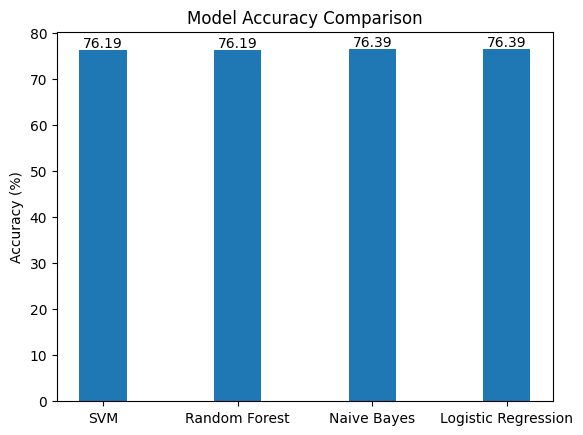

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_values = [76.19, 76.19, 76.39, 76.39]
model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
model_groups = [' Ensemble', ' Ensemble', 'Probabilistic', 'Probabilistic']

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x, accuracy_values, width)

ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)

for i, value in enumerate(accuracy_values):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.show()

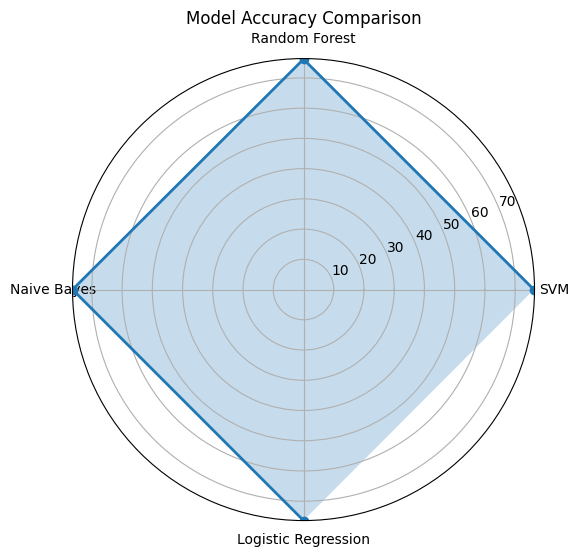

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_values = [76.19, 76.19, 76.39, 76.39]
model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'Logistic Regression']

# Calculate angles without extending the array
angles = np.linspace(0, 2*np.pi, len(model_names), endpoint=False)
# No need to concatenate values here
values = accuracy_values

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, model_names) # Now angles and model_names have the same length
ax.set_title('Model Accuracy Comparison')
plt.show()

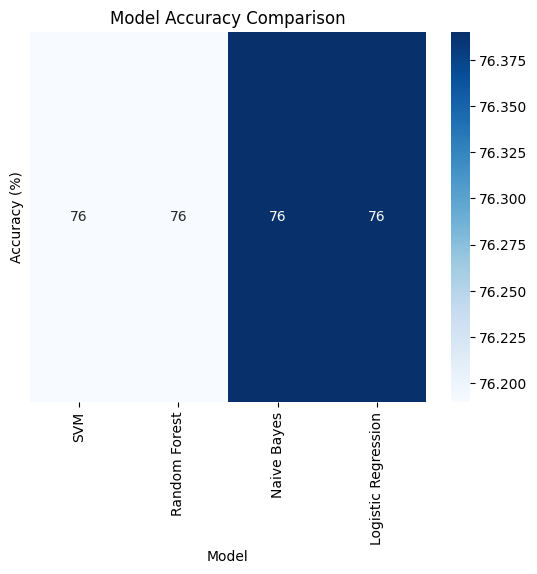

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_values = [76.19, 76.19, 76.39, 76.39]
model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'Logistic Regression']

sns.heatmap([accuracy_values], annot=True, cmap='Blues', xticklabels=model_names, yticklabels=False)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()

In [ ]:
import pandas as pd
accuracy_values = [accuracy_percent, grid_search.best_score_, accuracy_score(y_test, y_pred), accuracy_percent]
model_names = ['Ensemble Model', 'Random Forest', 'SVM', 'Voting Classifier']
df = pd.DataFrame({'Model': model_names, 'Accuracy (%)': accuracy_values})
print(df)

               Model  Accuracy (%)
0     Ensemble Model     76.185567
1      Random Forest      0.732716
2                SVM      0.761856
3  Voting Classifier     76.185567


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sentence = "The company's quarterly earnings report exceeded expectations, sending its stock price soaring to an all-time high."

In [ ]:
sentiment_scores = sia.polarity_scores(sentence)

In [ ]:
print("Sentiment scores:")
print("Positive:", sentiment_scores['pos'])
print("Negative:", sentiment_scores['neg'])
print("Neutral:", sentiment_scores['neu'])
print("Compound:", sentiment_scores['compound'])

Sentiment scores:
Positive: 0.0
Negative: 0.0
Neutral: 1.0
Compound: 0.0


In [ ]:
if sentiment_scores['compound'] >= 0.05:
    print("Sentiment: Positive")
elif sentiment_scores['compound'] <= -0.05:
    print("Sentiment: Negative")
else:
    print("Sentiment: Neutral")

Sentiment: Neutral


In [ ]:
#"The company's innovative new product has been a huge success, resulting in a significant increase in revenue and a boost to investor confidence."//positive sentiment sentence

#"The company's quarterly earnings report exceeded expectations, sending its stock price soaring to an all-time high."//neutral sentiment

#"The company's stock price plummeted after a disappointing earnings report, leading to a wave of investor panic and a significant decline in market value."//negative sentence
